In [144]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim


In [81]:
def imshow(img):
    plt.figure(figsize=(10, 7))
    plt.imshow(img[:,:,::-1])

4.png      coins.jpg  coins2.jpg coins3.jpg coins5.jpg coins6.jpg seven.jpeg


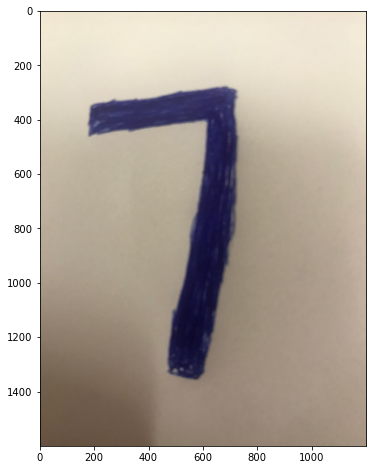

In [6]:
seven = cv2.imread('img/seven.jpeg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);
!ls img/

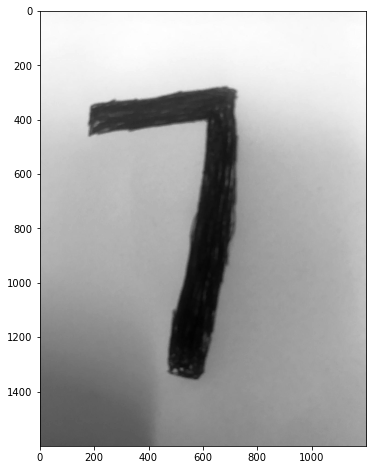

In [8]:
copy = seven.copy()
gray_copy = cv2.cvtColor(color_coins,cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (12,8))
plt.imshow(gray_copy, cmap='gray');

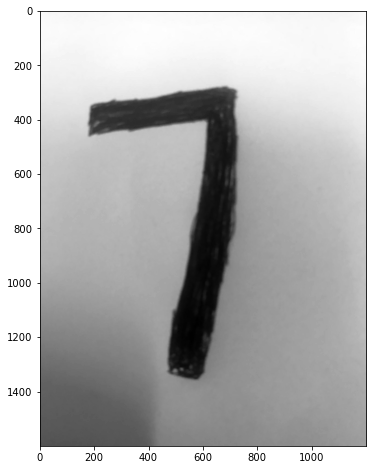

In [10]:
blur = cv2.GaussianBlur(gray_copy,(5,5),cv2.BORDER_DEFAULT)
plt.figure(figsize = (12,8))
plt.imshow(blur, cmap='gray');

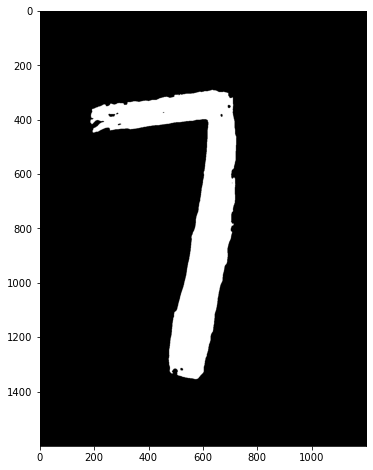

In [114]:
ret,th = cv2.threshold(blur,70,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize = (12,8))
plt.imshow(th, cmap='gray');

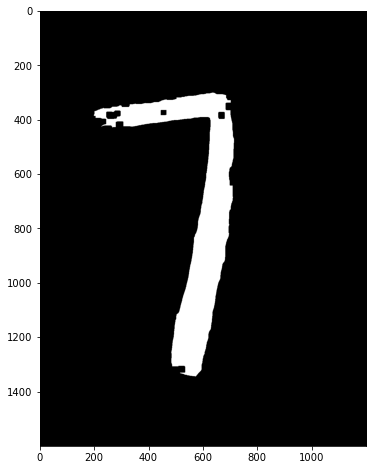

In [115]:
kernel = kernel = np.ones((3,3),np.uint8)
#closing = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
dilation = cv2.erode(th ,kernel,iterations = 8)

plt.figure(figsize = (12,8))
plt.imshow(dilation, cmap='gray');

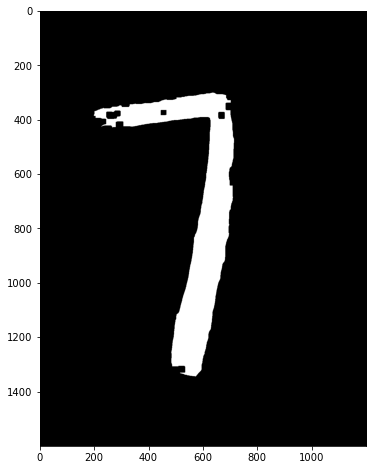

In [116]:
ret,th2 = cv2.threshold(dilation,70,255,cv2.THRESH_BINARY)
plt.figure(figsize = (12,8))
plt.imshow(th2, cmap='gray');

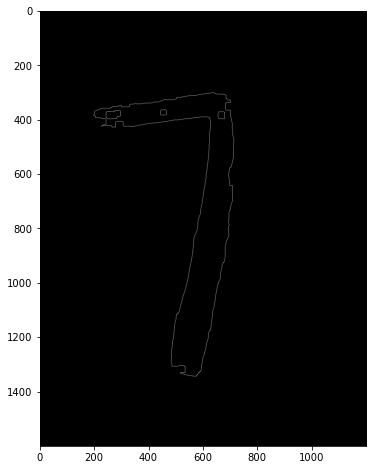

In [117]:
canny = cv2.Canny(th2,127,200)
plt.figure(figsize = (12,8))
plt.imshow(canny, cmap='gray');

In [118]:

np.set_printoptions(threshold=50000)
print(len(canny))
print(gray_copy.shape)
print(canny.max())

1600
(1600, 1200)
255


In [119]:
#contours, h = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [120]:
contours, h = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [132]:
img = cv2.drawContours(th, contours, -1, (0,255,0), 2)

cv2.imshow('my image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [122]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [141]:


boxes = []
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    boxes.append([x,y, x+w,y+h])

boxes = np.asarray(boxes)
left, top = np.min(boxes, axis=0)[:2]
right, bottom = np.max(boxes, axis=0)[2:]

rect = cv2.rectangle(canny, (left,top), (right,bottom), (255, 0, 0), 2)


cv2.imshow('draw all contours', rect)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [148]:
from torchvision import datasets, transforms, models
model = models.densenet121(pretrained=True)

In [149]:
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False